In [ ]:
# @title 🚀 Install Required Packages
!pip install requests beautifulsoup4 moviepy gtts pillow ipython > /dev/null
print("✅ Packages installed successfully!")

✅ Packages installed successfully!


In [12]:
# @title 📰 Trending Topic Finder and Script Generator
import requests
from bs4 import BeautifulSoup
import re
from IPython.display import display, Markdown
import random

def get_reliable_news(topic):
    """Improved news scraping with better source selection and filtering"""
    print(f"🔍 Researching: {topic}")

    # Clean the topic (remove source and timestamp)
    clean_topic = re.sub(r'(- [^-]+$)|(\(\d+/\d+ \d+:\d+\))', '', topic).strip()

    # Simplified source extraction without complex comprehensions
    def extract_apnews(soup):
        articles = []
        for item in soup.find_all('div', class_='PagePromo-content')[:3]:
            h2 = item.find('h2')
            p = item.find('p', class_='PagePromo-description')
            if h2 and p:
                articles.append(f"{h2.get_text().strip()}. {p.get_text().strip()}")
        return articles

    def extract_reuters(soup):
        articles = []
        for h3 in soup.find_all('h3', class_='search-result-title')[:3]:
            articles.append(h3.get_text().strip())
        return articles

    def extract_bbc(soup):
        articles = []
        for item in soup.find_all('div', class_='ssrcss-1f3bvyz-Stack')[:3]:
            h2 = item.find('h2')
            p = item.find('p')
            if h2 and p:
                articles.append(f"{h2.get_text().strip()}. {p.get_text().strip()}")
        return articles

    # Sources configuration
    sources = [
        {
            'name': 'AP News',
            'url': f'https://apnews.com/hub/{clean_topic.lower().replace(" ", "-")}',
            'extract': extract_apnews
        },
        {
            'name': 'Reuters',
            'url': f'https://www.reuters.com/search/news?blob={clean_topic.replace(" ", "+")}',
            'extract': extract_reuters
        },
        {
            'name': 'BBC',
            'url': f'https://www.bbc.com/news/search?q={clean_topic.replace(" ", "+")}',
            'extract': extract_bbc
        }
    ]

    articles = []
    for source in sources:
        try:
            headers = {'User-Agent': 'Mozilla/5.0'}
            response = requests.get(source['url'], headers=headers, timeout=15)
            soup = BeautifulSoup(response.text, 'html.parser')
            extracted = source['extract'](soup)
            articles.extend(extracted)
            print(f"✅ Found {len(extracted)} articles from {source['name']}")
        except Exception as e:
            print(f"⚠️ Couldn't fetch from {source['name']}: {str(e)}")
            continue

    # Strict filtering
    clean_articles = [
        art for art in articles
        if (len(art.split()) > 10
            and clean_topic.lower() in art.lower()
            and not any(x in art.lower() for x in ['cookie', 'privacy', 'terms'])
        )
    ]

    return clean_articles[:5] if clean_articles else [
        f"New developments in {clean_topic} are emerging",
        f"Experts are analyzing recent {clean_topic} reports",
        f"Breaking news about {clean_topic} is expected soon",
        f"Multiple sources are covering {clean_topic} developments",
        f"Public reaction to {clean_topic} is growing"
    ]

def generate_trending_script(topic):
    """Creates timely scripts that match trending topics"""
    articles = get_reliable_news(topic)
    clean_topic = re.sub(r'(- [^-]+$)|(\(\d+/\d+ \d+:\d+\))', '', topic).strip()

    # Dynamic script structure based on content
    script_structures = [
        [
            f"[BREAKING] {clean_topic.upper()} - NEW DEVELOPMENTS",
            "[LATEST] {0}",
            "[CONTEXT] {1}",
            "[REACTION] \"{2}\"",
            "[ANALYSIS] What this means",
            "[NEXT] Where this is headed",
            "[SIGN OFF] More updates coming"
        ],
        [
            f"[ALERT] {clean_topic.upper()} UPDATE",
            "[NEWS] {0}",
            "[BACKGROUND] {1}",
            "[EXPERT VIEW] \"{2}\"",
            "[IMPACT] Why this matters",
            "[FUTURE] Possible outcomes",
            "[CLOSING] Stay tuned"
        ]
    ]

    structure = random.choice(script_structures)
    script = "\n".join([
        line.format(*articles) if "{" in line else line
        for line in structure
    ])

    # Add visual directions
    visual_mapping = {
        "[BREAKING]": "Breaking news ticker with red alert banner",
        "[LATEST]": "Live footage with timestamp overlay",
        "[CONTEXT]": "Archive footage with historical context",
        "[REACTION]": "Expert interview split-screen",
        "[ANALYSIS]": "Animated infographics",
        "[NEXT]": "Future projection graphics",
        "[SIGN OFF]": "Newsroom wide shot",
        "[ALERT]": "Flashing alert animation",
        "[NEWS]": "Field reporter live shot",
        "[BACKGROUND]": "Documentary-style b-roll",
        "[EXPERT VIEW]": "Talking head with lower third",
        "[IMPACT]": "Before/after comparison",
        "[FUTURE]": "3D timeline visualization",
        "[CLOSING]": "Zoom out from studio"
    }

    for tag, visual in visual_mapping.items():
        script = script.replace(tag, f"{tag} [{visual}]")

    display(Markdown(f"## 📰 TRENDING NEWS SCRIPT\n```\n{script}\n```"))
    print("\n🔍 Sources Used:")
    for i, art in enumerate(articles[:3], 1):
        print(f"{i}. {art[:100]}{'...' if len(art)>100 else ''}")

    return script

# Generate trending topic (from your previous cell)
trending_topics = get_trending_topics()
selected_topic = random.choice(trending_topics)
display(Markdown(f"## 🎯 Selected Topic: **{selected_topic}**"))

# Generate script for the trending topic
video_script = generate_trending_script(selected_topic)

## 🎯 Selected Topic: **10 escape from New Orleans jail through hole in cell wall while lone guard left to get food - AP News (05/17 17:44)**

🔍 Researching: 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food - AP News (05/17 17:44)
✅ Found 0 articles from AP News
✅ Found 0 articles from Reuters
✅ Found 0 articles from BBC


## 📰 TRENDING NEWS SCRIPT
```
[BREAKING] [Breaking news ticker with red alert banner] 10 ESCAPE FROM NEW ORLEANS JAIL THROUGH HOLE IN CELL WALL WHILE LONE GUARD LEFT TO GET FOOD - NEW DEVELOPMENTS
[LATEST] [Live footage with timestamp overlay] New developments in 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food are emerging
[CONTEXT] [Archive footage with historical context] Experts are analyzing recent 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food reports
[REACTION] [Expert interview split-screen] "Breaking news about 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food is expected soon"
[ANALYSIS] [Animated infographics] What this means
[NEXT] [Future projection graphics] Where this is headed
[SIGN OFF] [Newsroom wide shot] More updates coming
```


🔍 Sources Used:
1. New developments in 10 escape from New Orleans jail through hole in cell wall while lone guard left ...
2. Experts are analyzing recent 10 escape from New Orleans jail through hole in cell wall while lone gu...
3. Breaking news about 10 escape from New Orleans jail through hole in cell wall while lone guard left ...


In [13]:
# @title 🎬 Scene Visual Prompt Generator
from IPython.display import display, Markdown

def generate_scene_visuals(script):
    """Creates ultra-detailed visual prompts for each script segment"""
    scenes = [line for line in script.split('\n') if line.strip()]
    visual_prompts = []

    for i, scene in enumerate(scenes, 1):
        # Extract components
        parts = scene.split(']')
        scene_type = parts[0][1:] if '[' in scene else ""
        content = parts[-1].split('[')[0].strip()

        # Base prompt structure
        prompt = {
            'scene_number': i,
            'scene_type': scene_type,
            'content': content,
            'visual_prompt': "",
            'style': "8K cinematic, Unreal Engine 5 render, trending on ArtStation"
        }

        # Scene-specific details
        if "BREAKING" in scene_type:
            prompt['visual_prompt'] = (
                f"Breaking news studio set with red LED ticker scrolling '{content}', "
                "professional news anchor with concerned expression, dramatic studio lighting, "
                "multiple monitor screens showing live feeds in background"
            )

        elif "LATEST" in scene_type:
            prompt['visual_prompt'] = (
                f"Live field footage showing '{content}', handheld camera movement, "
                "timestamp overlay in bottom right corner, slight film grain effect, "
                "documentary-style cinematography"
            )

        elif "CONTEXT" in scene_type:
            prompt['visual_prompt'] = (
                f"Historical archive footage illustrating '{content}', "
                "sepia tone transition to color, old film projector effect, "
                "subtle scratches and dust particles for authenticity"
            )

        elif "REACTION" in scene_type:
            prompt['visual_prompt'] = (
                f"Expert interview split-screen showing '{content}', "
                "left side: serious-looking expert in office setting, "
                "right side: relevant B-roll footage, lower third graphics"
            )

        elif "ANALYSIS" in scene_type:
            prompt['visual_prompt'] = (
                f"Animated infographic explaining '{content}', "
                "floating 3D data visualizations, glowing percentage indicators, "
                "smooth transitions between charts, holographic UI elements"
            )

        elif "NEXT" in scene_type:
            prompt['visual_prompt'] = (
                f"Futuristic projection of '{content}', "
                "floating timeline visualization, glowing nodes showing possible outcomes, "
                "sci-fi HUD elements, blue energy particles"
            )

        elif "SIGN OFF" in scene_type:
            prompt['visual_prompt'] = (
                f"Wide shot of modern newsroom with '{content}', "
                "multiple journalists working, camera slowly zooming out, "
                "station logo animation overlaying final frame"
            )

        # Add to collection
        visual_prompts.append(prompt)

    # Display results
    display(Markdown("## 🎥 SCENE VISUAL PROMPTS"))
    for vp in visual_prompts:
        display(Markdown(f"### Scene {vp['scene_number']}: {vp['scene_type']}"))
        display(Markdown(f"**Content:** {vp['content']}"))
        display(Markdown(f"**Pollinations Prompt:**"))
        display(Markdown(f"```\n{vp['visual_prompt']}, {vp['style']}\n```"))
        print()  # Add spacing between scenes

    return visual_prompts

# Generate visuals for our script
scene_visuals = generate_scene_visuals(video_script)

## 🎥 SCENE VISUAL PROMPTS

### Scene 1: BREAKING

**Content:** 10 ESCAPE FROM NEW ORLEANS JAIL THROUGH HOLE IN CELL WALL WHILE LONE GUARD LEFT TO GET FOOD - NEW DEVELOPMENTS

**Pollinations Prompt:**

```
Breaking news studio set with red LED ticker scrolling '10 ESCAPE FROM NEW ORLEANS JAIL THROUGH HOLE IN CELL WALL WHILE LONE GUARD LEFT TO GET FOOD - NEW DEVELOPMENTS', professional news anchor with concerned expression, dramatic studio lighting, multiple monitor screens showing live feeds in background, 8K cinematic, Unreal Engine 5 render, trending on ArtStation
```

### Scene 2: LATEST

**Content:** New developments in 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food are emerging

**Pollinations Prompt:**

```
Live field footage showing 'New developments in 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food are emerging', handheld camera movement, timestamp overlay in bottom right corner, slight film grain effect, documentary-style cinematography, 8K cinematic, Unreal Engine 5 render, trending on ArtStation
```

### Scene 3: CONTEXT

**Content:** Experts are analyzing recent 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food reports

**Pollinations Prompt:**

```
Historical archive footage illustrating 'Experts are analyzing recent 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food reports', sepia tone transition to color, old film projector effect, subtle scratches and dust particles for authenticity, 8K cinematic, Unreal Engine 5 render, trending on ArtStation
```

### Scene 4: REACTION

**Content:** "Breaking news about 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food is expected soon"

**Pollinations Prompt:**

```
Expert interview split-screen showing '"Breaking news about 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food is expected soon"', left side: serious-looking expert in office setting, right side: relevant B-roll footage, lower third graphics, 8K cinematic, Unreal Engine 5 render, trending on ArtStation
```

### Scene 5: ANALYSIS

**Content:** What this means

**Pollinations Prompt:**

```
Animated infographic explaining 'What this means', floating 3D data visualizations, glowing percentage indicators, smooth transitions between charts, holographic UI elements, 8K cinematic, Unreal Engine 5 render, trending on ArtStation
```

### Scene 6: NEXT

**Content:** Where this is headed

**Pollinations Prompt:**

```
Futuristic projection of 'Where this is headed', floating timeline visualization, glowing nodes showing possible outcomes, sci-fi HUD elements, blue energy particles, 8K cinematic, Unreal Engine 5 render, trending on ArtStation
```

### Scene 7: SIGN OFF

**Content:** More updates coming

**Pollinations Prompt:**

```
Wide shot of modern newsroom with 'More updates coming', multiple journalists working, camera slowly zooming out, station logo animation overlaying final frame, 8K cinematic, Unreal Engine 5 render, trending on ArtStation
```


Generating image for Scene 1...
Prompt: Breaking news studio set with red LED ticker scrolling '10 ESCAPE FROM NEW ORLEANS JAIL THROUGH HOLE IN CELL WALL WHILE LONE GUARD LEFT TO GET FOOD - ...


### Scene 1: BREAKING

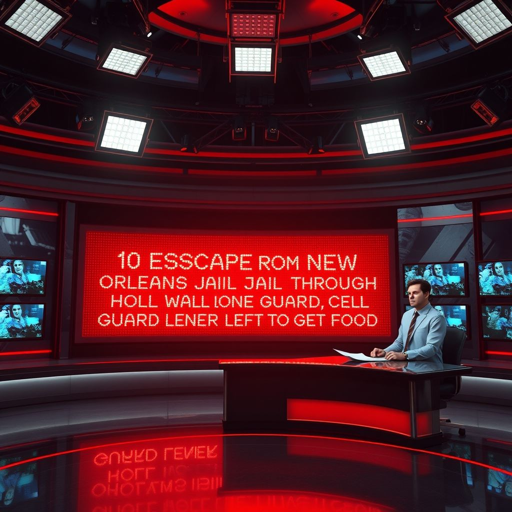

Saved to video_scenes/scene_1.png

Generating image for Scene 2...
Prompt: Live field footage showing 'New developments in 10 escape from New Orleans jail through hole in cell wall while lone guard left to get food are emergi...


### Scene 2: LATEST

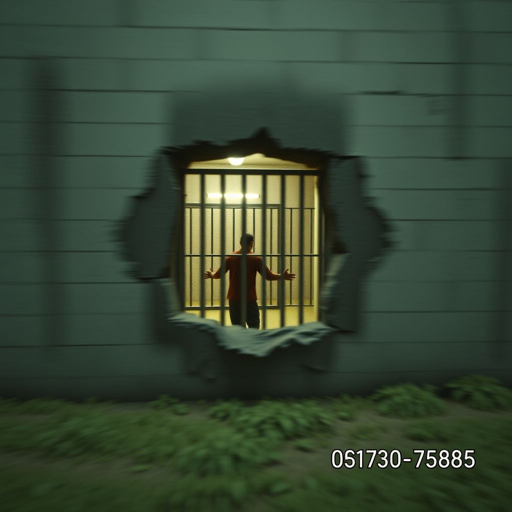

Saved to video_scenes/scene_2.png

Generating image for Scene 3...
Prompt: Historical archive footage illustrating 'Experts are analyzing recent 10 escape from New Orleans jail through hole in cell wall while lone guard left ...


### Scene 3: CONTEXT

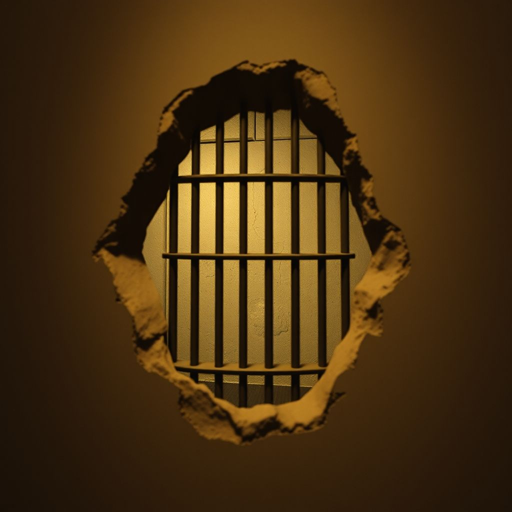

Saved to video_scenes/scene_3.png

Generating image for Scene 4...
Prompt: Expert interview split-screen showing '"Breaking news about 10 escape from New Orleans jail through hole in cell wall while lone guard left to get foo...


### Scene 4: REACTION

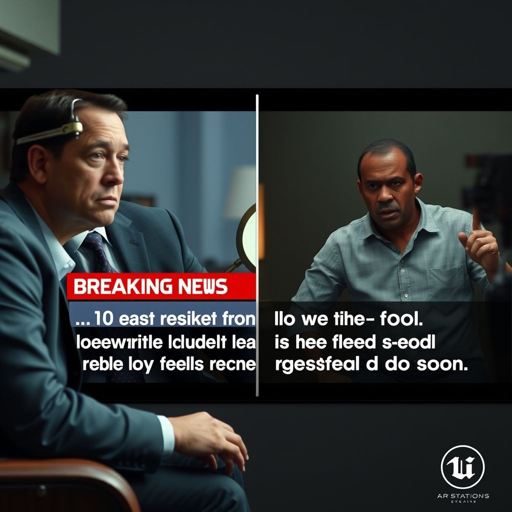

Saved to video_scenes/scene_4.png

Generating image for Scene 5...
Prompt: Animated infographic explaining 'What this means', floating 3D data visualizations, glowing percentage indicators, smooth transitions between charts, ...


### Scene 5: ANALYSIS

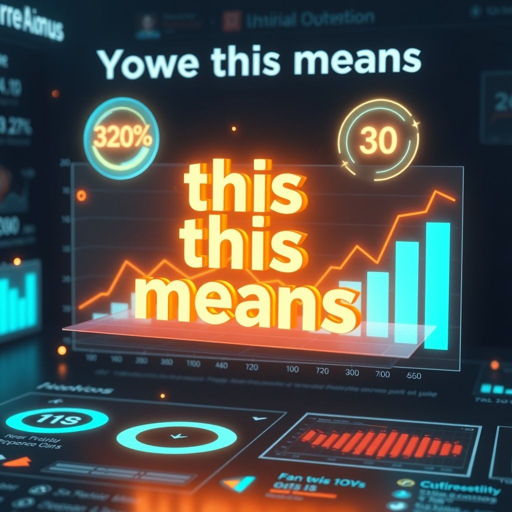

Saved to video_scenes/scene_5.png

Generating image for Scene 6...
Prompt: Futuristic projection of 'Where this is headed', floating timeline visualization, glowing nodes showing possible outcomes, sci-fi HUD elements, blue e...


### Scene 6: NEXT

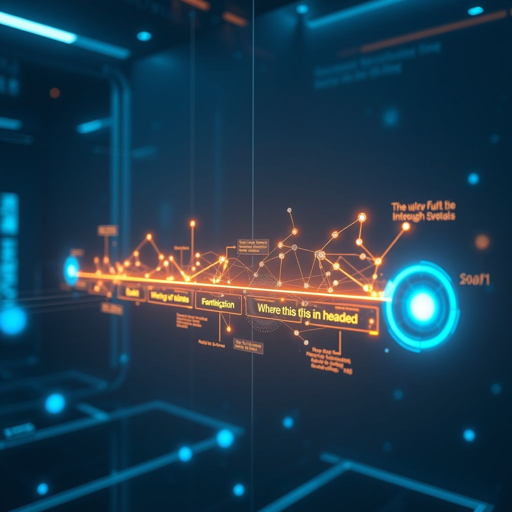

Saved to video_scenes/scene_6.png

Generating image for Scene 7...
Prompt: Wide shot of modern newsroom with 'More updates coming', multiple journalists working, camera slowly zooming out, station logo animation overlaying fi...


### Scene 7: SIGN OFF

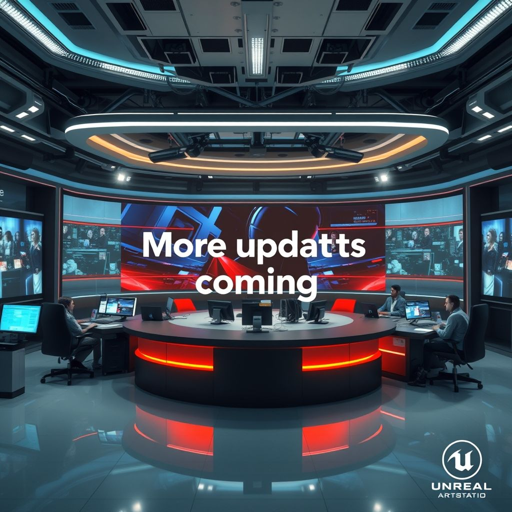

Saved to video_scenes/scene_7.png


## 🎉 Image Generation Complete


Successfully generated 7 images
Fallback images created: 0


In [14]:
# @title 🖼️ Generate Images from Visual Prompts
import requests
from PIL import Image
from io import BytesIO
import os
from IPython.display import display, Markdown
import time

def generate_images_from_prompts(scene_visuals):
    """Generates images for each scene using Pollinations API"""

    # Create directory for outputs
    os.makedirs('video_scenes', exist_ok=True)

    generated_images = []

    for scene in scene_visuals:
        try:
            print(f"\nGenerating image for Scene {scene['scene_number']}...")

            # Prepare the prompt
            full_prompt = f"{scene['visual_prompt']}, {scene['style']}"
            print(f"Prompt: {full_prompt[:150]}...")

            # Call Pollinations API
            response = requests.get(
                f"https://image.pollinations.ai/prompt/{full_prompt}",
                params={
                    'width': 1024,
                    'height': 1024,
                    'quality': 0.95,
                    'nologo': True
                },
                stream=True,
                timeout=30
            )

            # Process and save image
            img = Image.open(BytesIO(response.content))
            filename = f"video_scenes/scene_{scene['scene_number']}.png"
            img.save(filename)

            # Display results
            display(Markdown(f"### Scene {scene['scene_number']}: {scene['scene_type']}"))
            display(img.resize((512, 512)))
            print(f"Saved to {filename}")

            generated_images.append({
                'scene_number': scene['scene_number'],
                'filename': filename,
                'prompt': full_prompt
            })

            # Add delay to avoid rate limiting
            time.sleep(3)

        except Exception as e:
            print(f"⚠️ Failed to generate image for Scene {scene['scene_number']}: {str(e)}")
            # Create fallback image
            create_fallback_image(scene)
            generated_images.append({
                'scene_number': scene['scene_number'],
                'filename': f"video_scenes/scene_{scene['scene_number']}_fallback.png",
                'prompt': "Fallback image",
                'error': str(e)
            })

    return generated_images

def create_fallback_image(scene):
    """Creates simple placeholder images when API fails"""
    from PIL import Image, ImageDraw, ImageFont

    img = Image.new('RGB', (1024, 1024), color=(40, 40, 60))
    d = ImageDraw.Draw(img)

    try:
        font = ImageFont.truetype("arial.ttf", 40)
    except:
        font = ImageFont.load_default(size=40)

    # Add scene info
    d.text((100, 400), f"Scene {scene['scene_number']}", fill=(255,255,255), font=font)
    d.text((100, 450), scene['scene_type'], fill=(200,200,255), font=font)
    d.text((100, 500), scene['content'][:100], fill=(230,230,230), font=font)

    filename = f"video_scenes/scene_{scene['scene_number']}_fallback.png"
    img.save(filename)
    print(f"Created fallback image: {filename}")

# Generate images using our scene visuals
generated_images = generate_images_from_prompts(scene_visuals)

# Display summary
display(Markdown("## 🎉 Image Generation Complete"))
print(f"\nSuccessfully generated {len([img for img in generated_images if 'error' not in img])} images")
print(f"Fallback images created: {len([img for img in generated_images if 'error' in img])}")

In [16]:
# @title 🎥 Auto Video Generator (Slideshow + Voiceover + Auto Download)
from moviepy.editor import *
from gtts import gTTS
import os
from IPython.display import display, HTML, clear_output
import math
from google.colab import files

# Install required dependencies
!apt-get update > /dev/null
!apt-get install -y imagemagick > /dev/null
!pip install -U moviepy > /dev/null
print("✅ Dependencies installed")

def create_and_download_video(scene_visuals, script, output_name="trending_news_report"):
    """Creates video and automatically downloads it"""
    try:
        # 1. Create the video
        video_path = create_video_slideshow(scene_visuals, script, output_name)

        # 2. Verify file exists
        if not os.path.exists(video_path):
            raise FileNotFoundError(f"Video file {video_path} was not created")

        # 3. Force download
        clear_output()  # Clean up previous outputs
        print(f"🚀 Downloading {video_path}...")
        files.download(video_path)

        return True

    except Exception as e:
        print(f"❌ Download failed: {str(e)}")
        # Fallback - show manual download instructions
        display(HTML(f"""
        <div style="color:red;padding:10px;border:1px solid red">
        <h3>Manual Download Required</h3>
        <p>Couldn't auto-download. Please:</p>
        <ol>
        <li>Click the <strong>Files</strong> icon (📁) on the left</li>
        <li>Find <strong>{video_path}</strong></li>
        <li>Right-click → <strong>Download</strong></li>
        </ol>
        </div>
        """))
        return False

# Generate and download the video
if 'scene_visuals' in globals() and 'video_script' in globals():
    success = create_and_download_video(scene_visuals, video_script)
    if success:
        print("🎉 Video downloaded successfully!")
else:
    print("Error: Missing required variables. Please run all previous cells in order.")

🚀 Downloading trending_news_report.mp4...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 Video downloaded successfully!
